# CN2

- O algoritmo aceita apenas atributos do tipo string

## Carregando Biblioteca

In [1]:
library(repr)
library(caTools)
options(repr.plot.width = 4, repr.plot.height = 4)
# CN2
library(RoughSets)
#Preprocessamento
library(CatEncoders)
library(gplots)
#Matricas
library(caret)

package 'RoughSets' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Adria\AppData\Local\Temp\RtmpCyLnOQ\downloaded_packages


Warning message:
"package 'RoughSets' was built under R version 3.6.3"Loading required package: Rcpp

Attaching package: 'CatEncoders'

The following object is masked from 'package:base':

    transform


Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess

Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


## Carregando os dados

In [2]:
df <- read.csv("../datasets/titanic/train.csv", na.strings = '')
head(df)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NA,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NA,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NA,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,NA,Q


## Pré-Processamento de Dados

In [3]:
# Extração de Pronomes
df$Name <- ifelse(grepl(", Mr. ", df$Name), 'Mr', as.character(df$Name))
df$Name <- ifelse(grepl("Capt", df$Name), 'Tripulacao', as.character(df$Name))
df$Name <- ifelse(grepl("Don", df$Name), 'Mr', as.character(df$Name))
df$Name <- ifelse(grepl("Major", df$Name), 'Tripulacao', as.character(df$Name))
df$Name <- ifelse(grepl("Col", df$Name), 'Tripulacao', as.character(df$Name))
df$Name <- ifelse(grepl("Dr", df$Name), 'Dr', as.character(df$Name))
df$Name <- ifelse(grepl("Rev", df$Name), 'Rev', as.character(df$Name))
df$Name <- ifelse(grepl("Sir", df$Name), 'Mr', as.character(df$Name))
df$Name <- ifelse(grepl("Jonkheer", df$Name), 'Mr', as.character(df$Name))
df$Name <- ifelse(grepl("Dona", df$Name), 'Mrs', as.character(df$Name))
df$Name <- ifelse(grepl("Countess", df$Name), 'Mrs', as.character(df$Name))
df$Name <- ifelse(grepl("Mme", df$Name), 'Mrs', as.character(df$Name))
df$Name <- ifelse(grepl("Lady", df$Name), 'Mrs', as.character(df$Name))
df$Name <- ifelse(grepl("Mrs", df$Name), 'Mrs', as.character(df$Name))
df$Name <- ifelse(grepl("Mlle", df$Name), 'Miss', as.character(df$Name))
df$Name <- ifelse(grepl("Ms", df$Name), 'Miss', as.character(df$Name))
df$Name <- ifelse(grepl("Miss", df$Name), 'Miss', as.character(df$Name))
df$Name <- ifelse(grepl("Master", df$Name), 'Master', as.character(df$Name))


# Substituir valores ausentes/nulos
media <- mean(df$Age, na.rm = TRUE)
df$Age <- ifelse(is.na(df$Age), media, df$Age)

t <- table(df$Embarked)
moda <- names(t[t == max(t)])

df$Embarked <- ifelse(is.na(df$Embarked), as.character(moda), as.character(df$Embarked) )

# Remoção de colunas
df$PassengerId <- NULL
df$Ticket <- NULL
df$Cabin <- NULL

df$Name = factor(df$Name)
df$Pclass = factor(df$Pclass)
df$Sex = factor(df$Sex)
df$Embarked = factor(df$Embarked)

#Ordenar o DATAFRAME

df = df[, c('Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Survived')]

head(df)
str(df)

Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
3,Mr,male,22.00000,1,0,7.2500,S,0
1,Mrs,female,38.00000,1,0,71.2833,C,1
3,Miss,female,26.00000,0,0,7.9250,S,1
1,Mrs,female,35.00000,1,0,53.1000,S,1
3,Mr,male,35.00000,0,0,8.0500,S,0
3,Mr,male,29.69912,0,0,8.4583,Q,0


'data.frame':	891 obs. of  9 variables:
 $ Pclass  : Factor w/ 3 levels "1","2","3": 3 1 3 1 3 3 1 3 3 2 ...
 $ Name    : Factor w/ 7 levels "Dr","Master",..: 4 5 3 5 4 4 4 2 5 5 ...
 $ Sex     : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age     : num  22 38 26 35 35 ...
 $ SibSp   : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch   : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Fare    : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Embarked: Factor w/ 3 levels "C","Q","S": 3 1 3 3 3 2 3 3 3 1 ...
 $ Survived: int  0 1 1 1 0 0 0 0 1 1 ...


# Divisão dos dados em treino e teste

In [4]:
set.seed(0)
divisao <- sample.split(df$Survived, SplitRatio = 0.75)

treino <- subset(df, divisao == TRUE)
teste <-  subset(df, divisao == FALSE)

## Tabela de Decisão
- O algoritmo CN2 utiliza um formato diferente de DF, por isso precisamos converter

In [5]:
dt_treinamento = SF.asDecisionTable(dataset = treino,  decision.attr = 9)
dt_teste = SF.asDecisionTable(dataset = teste, decision.attr = 9)
head(dt_teste)

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
1,3,Mr,male,22,1,0,7.250,S,0
4,1,Mrs,female,35,1,0,53.100,S,1
8,3,Master,male,2,3,1,21.075,S,0
11,3,Miss,female,4,1,1,16.700,S,1
12,1,Miss,female,58,0,0,26.550,S,1
14,3,Mr,male,39,1,5,31.275,S,0


## Discretização dos dados

- O algoritmo aceita apenas atributos do tipo string, por isso precisamos discretizar os dados contínuos

In [6]:
intervalos = D.discretization.RST(dt_treinamento, nOfIntervals = 4)
dt_treinamento = SF.applyDecTable(dt_treinamento, intervalos)
dt_teste = SF.applyDecTable(dt_teste, intervalos)
head(dt_teste)

Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
3,Mr,male,"[-Inf,23)","[1, Inf]","[0, Inf]","[-Inf,7.92)",S,0
1,Mrs,female,"[35, Inf]","[1, Inf]","[0, Inf]","[31.3, Inf]",S,1
3,Master,male,"[-Inf,23)","[1, Inf]","[0, Inf]","[14.8,31.3)",S,0
3,Miss,female,"[-Inf,23)","[1, Inf]","[0, Inf]","[14.8,31.3)",S,1
1,Miss,female,"[35, Inf]","[0,1)","[0, Inf]","[14.8,31.3)",S,1
3,Mr,male,"[35, Inf]","[1, Inf]","[0, Inf]","[14.8,31.3)",S,0


## CN2
Argumentos

- **tabela de decisão** - Um objeto herdado da classe "DecisionTable", que representa um sistema de decisão. Consulte SF.asDecisionTable.
- **K** - Um número inteiro positivo que controla a complexidade do algoritmo. Em cada iteração, os K melhores predicados de regra são estendidos por todos os descritores possíveis.

In [7]:
classificador = RI.CN2Rules.RST(dt_treinamento, K = 3)

# Regras
to

In [8]:
print(classificador)

A set consisting of  84  rules:
1. IF Name is Mr and Fare is [-Inf,7.92) and Age is [35, Inf] THEN Survived is 0;
		(supportSize=23; laplace=0.96) 
2. IF Name is Mr and Fare is [-Inf,7.92) and Embarked is S and Age is [-Inf,23) THEN Survived is 0;
		(supportSize=22; laplace=0.9583) 
3. IF Name is Mr and Pclass is 2 and Age is [23,29.7) THEN Survived is 0;
		(supportSize=18; laplace=0.95) 
4. IF Name is Mrs and Pclass is 1 and Age is [35, Inf] THEN Survived is 1;
		(supportSize=21; laplace=0.9565) 
5. IF Name is Mr and Fare is [-Inf,7.92) and Age is [29.7,35) THEN Survived is 0;
		(supportSize=55; laplace=0.9123) 
6. IF Name is Rev THEN Survived is 0;
		(supportSize=5; laplace=0.8571) 
7. IF Name is Mr and Pclass is 3 and SibSp is [1, Inf] and Embarked is S THEN Survived is 0;
		(supportSize=27; laplace=0.9655) 
8. IF Sex is female and Pclass is 1 and SibSp is [0,1) and Fare is [31.3, Inf] THEN Survived is 1;
		(supportSize=28; laplace=0.9667) 
9. IF Name is Mr and Fare is [7.92,14.8) a

## Prever os dados de Teste

In [9]:
previsao = predict(classificador, newdata = dt_teste[-9])
acuracia = 100 * sum(previsao == dt_teste[9])/nrow(dt_teste[9])
acuracia

[1] 76.68161

# Matriz de Confusão

- A função **table** realiza o agrupamento dos dados
- A função **confusionMatriz** da biblioteca **caret** também calcula a matriz de confusão + as métricas

In [10]:
matriz_confusao = table(dt_teste[, 9], unlist(previsao))
matriz_confusao

   
      0   1
  0 114  23
  1  29  57

In [11]:
matriz = confusionMatrix(factor(unlist(previsao)), factor(dt_teste[, 9]))
matriz

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 114  29
         1  23  57
                                          
               Accuracy : 0.7668          
                 95% CI : (0.7057, 0.8207)
    No Information Rate : 0.6143          
    P-Value [Acc > NIR] : 9.448e-07       
                                          
                  Kappa : 0.5014          
                                          
 Mcnemar's Test P-Value : 0.4881          
                                          
            Sensitivity : 0.8321          
            Specificity : 0.6628          
         Pos Pred Value : 0.7972          
         Neg Pred Value : 0.7125          
             Prevalence : 0.6143          
         Detection Rate : 0.5112          
   Detection Prevalence : 0.6413          
      Balanced Accuracy : 0.7475          
                                          
       'Positive' Class : 0               
                              

## Personalizando a Matriz de Confusão

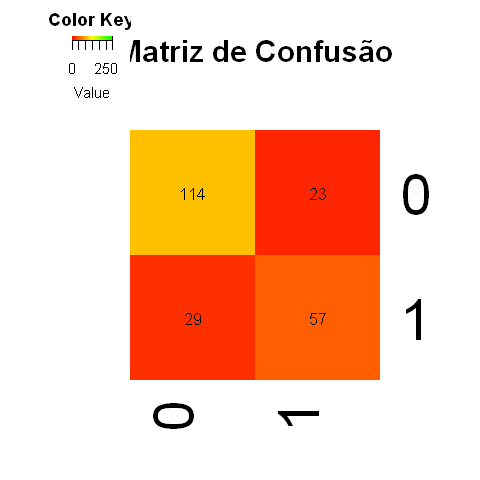

In [12]:
my_palette <- colorRampPalette(c("red", "yellow", "green"))

col_breaks = c(0:50, 51:100, 101:300)

heatmap.2(matriz_confusao,
    Rowv = 'NA',
    cellnote = matriz_confusao, 
    main = "Matriz de Confusão",
    notecol="black",      
    density.info="none",  
    trace="none",        
    col=my_palette,       
    breaks=col_breaks,   
    dendrogram= 'none',     
    Colv="NA" 
)

# Métricas

- **Precisão** que é a fração de instâncias recuperadas que são relevantes, 
- **Recall** - que é a fração de instâncias relevantes que são recuperadas 
- **f-score** - é 2 * precisão * recall / (precisão + recall) é 

In [13]:
precision(factor(unlist(previsao)), factor(dt_teste[, 9]))
'Morto'
precision(factor(unlist(previsao)), factor(dt_teste[, 9]), relevant = 2)
'Vivo'
precision(factor(unlist(previsao)), factor(dt_teste[, 9]), relevant = 1)

[1] 0.7972028

[1] "Morto"

[1] 0.7125

[1] "Vivo"

[1] 0.7972028

In [14]:
recall(factor(unlist(previsao)), factor(dt_teste[, 9]))
'Morto'
recall(factor(unlist(previsao)), factor(dt_teste[, 9]), relevant = 2)
'Vivo'
recall(factor(unlist(previsao)), factor(dt_teste[, 9]), relevant = 1)

[1] 0.8321168

[1] "Morto"

[1] 0.6627907

[1] "Vivo"

[1] 0.8321168

In [15]:
F_meas(factor(unlist(previsao)), factor(dt_teste[, 9]))
'Morto'
F_meas(factor(unlist(previsao)), factor(dt_teste[, 9]), relevant = 2)
'Vivo'
F_meas(factor(unlist(previsao)), factor(dt_teste[, 9]), relevant = 1)

[1] 0.8142857

[1] "Morto"

[1] 0.686747

[1] "Vivo"

[1] 0.8142857